# Consumer Maximization Problem with Cobb-Douglas Utility 

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from scipy import linalg
from scipy import interpolate 
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

# Model description and consumer maximization problem 

We consider the 2 good world x1 and x2 with  preference described by **Cobb Douglas utility function** where:

**utility** is given by $u(x_1,x_2)$.

$$ {u(x_1,x_2)} =  A{x_1^{\beta}}{x_2^{1-\beta}} $$

the customer is trying to solve utility maximization problem with **budet constraint**

$$ p_1x_1 + p_2x_2 = I $$
$$ p_1,p_2,I > 0 $$

## Analytical Solution

First we define all **symbols**:

In [3]:
A = sm.symbols('A')
beta = sm.symbols('beta')
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')
U = sm.symbols('U')

define objective function

In [4]:
utility = A*x1**beta * x2**(1-beta)

define budget constraint 

In [5]:
bc = sm.Eq(p1*x1 + p2*x2, I)

isolate x2 from budget constraint 

In [6]:
x2_c = sm.solve(bc, x2)
x2_c[0]

(I - p_1*x_1)/p_2

substitute x2 into objective function 

In [7]:
utility_subs = utility.subs(x2,x2_c[0])
utility_subs

A*x_1**beta*((I - p_1*x_1)/p_2)**(1 - beta)

take the derivative 

In [8]:
foc = sm.diff(utility_subs, x1)
foc

A*beta*x_1**beta*((I - p_1*x_1)/p_2)**(1 - beta)/x_1 - A*p_1*x_1**beta*((I - p_1*x_1)/p_2)**(1 - beta)*(1 - beta)/(I - p_1*x_1)

solve for FOC

In [9]:
x1_sol = sm.solve(sm.Eq(foc,0),x1)
x1_sol[0]

I*beta/p_1

apply the same procedure to obtain the result of x2

In [10]:
x1_c = sm.solve(bc, x1)
utility_subs_0 = utility.subs(x1,x1_c[0])
foc_0 = sm.diff(utility_subs_0, x2)
x2_sol = sm.solve(sm.Eq(foc_0,0),x2)
x2_sol[0]

-I*(beta - 1)/p_2

## Numerical solution for Cobb-Douglas Utility

In [11]:
# first we define utility function 
def util(x1,x2,A,beta):
    util = A*x1**beta *x2**(1-beta)
    return util

To find the optimal choice of x1 and x2 we loop through a grid of $N1 \times N2$ possible solutions 

In [12]:
def optimal_choice(A,beta,I,p1,p2,N1,N2,do_print=True):
    
    # a. allocate numpy arrays
    shape_tuple = (N1,N2)
    x1_values = np.empty(shape_tuple)
    x2_values = np.empty(shape_tuple)
    u_values = np.empty(shape_tuple)
    
    # b. initialize optimal value of x1,x2 and utility
    x1_best = 0
    x2_best = 0
    u_best = util(0,0,A=A,beta=beta)
    
    # c. loop through all possibilities
    for i in range(N1):
        for j in range(N2):
            
            # i. x1 and x2 (chained assignment)
            x1_values[i,j] = x1 = (i/(N1-1))*I/p1
            x2_values[i,j] = x2 = (j/(N2-1))*I/p2
            
            # ii. utility
            if p1*x1+p2*x2 <= I: # u(x1,x2) if within budget constraint 
                u_values[i,j] = util(x1,x2,A=A,beta=beta)
            else: # u(0,0) if out of budget constraint
                u_values[i,j] = util(0,0,A=A,beta=beta)
            
            # iii. check if best sofar
            if u_values[i,j] > u_best:
                x1_best = x1_values[i,j]
                x2_best = x2_values[i,j] 
                u_best = u_values[i,j]
    
    # d. print
    if do_print:
        print_solution(x1_best,x2_best,u_best,I,p1,p2)

    return x1_best,x2_best,u_best,x1_values,x2_values,u_values

# function for printing the solution
def print_solution(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.8f}')
    print(f'x2 = {x2:.8f}')
    print(f'u  = {u:.8f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.8f}') 

then call the function with given values of alpha,beta,p1,p2,I, N1 and N2 for consumer A 

In [13]:
sol_0 = optimal_choice(A=4,beta=0.1,I=20,p1=2,p2=3,N1=500,N2=500)

x1 = 1.00200401
x2 = 5.99866399
u  = 20.06300678
I-p1*x1-p2*x2 = 0.00000000


3D plotting for the solution

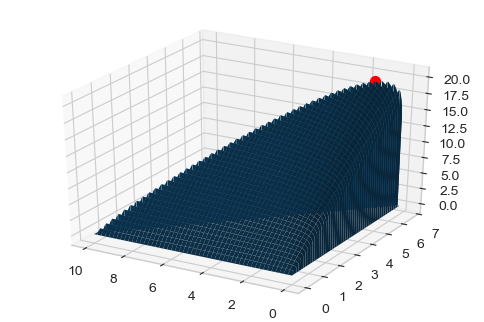

In [14]:
# a. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_0

# b. setup figure
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1,projection='3d')

# c. plot 3d surface of utility values with different x1 and x2
ax.plot_surface(x1_values,x2_values,u_values)
ax.invert_xaxis()

# d. find optimal choice
ax.scatter(x1_best,x2_best,u_best,s=50,color='red');

Text(0.5, 1.0, 'value of choice')

<Figure size 720x288 with 0 Axes>

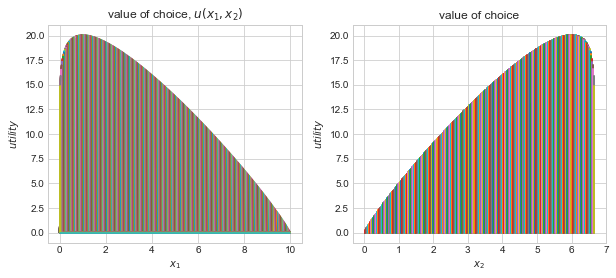

In [15]:
plt.style.use('seaborn-whitegrid')

# a. create the figure
fig = plt.figure(figsize=(10,4))

# b. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_0

# c. plot
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x1_values,u_values)
ax.set_title('value of choice, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$utility$')

ax = fig.add_subplot(1,2,2)
ax.plot(x2_values,u_values)
ax.set_xlabel('$x_2$')
ax.set_ylabel('$utility$')
ax.set_title('value of choice')

We have also applied different approach to solve the maximization problem.
First, we define the values of p1, p2, alpha, beta and I:

In [16]:
p1 = 2
p2 = 3
I = 20
A = 4 
beta = 0.1

then we use multi-dimensional constraint solver

In [17]:
# a. objective function for minimizing 
def func_0(x,A,beta,I,p1,p2):
    # x is a vector
    x1 = x[0]
    x2 = x[1]
    return -util(x1,x2,A,beta)

# b. constraints and bounds
constraints = ({'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]})
bounds = ((0,I/p1),(0,I/p2))

# c. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_1 = optimize.minimize(
    func_0,initial_guess,args=(A,beta,p1,p2,I),
    method='SLSQP',bounds=bounds,constraints=constraints)

# d. unpack solution
x1 = sol_1.x[0]
x2 = sol_1.x[1]
u = util(x1,x2,A,beta)
print_solution(x1,x2,u,I,p1,p2)

x1 = 1.00024182
x2 = 5.99983879
u  = 20.06301118
I-p1*x1-p2*x2 = -0.00000000


# Visualization and Further Analysis 

The indifference curve running through $(y_1,y_2)$ is given by
$$
\big\{(x_1,x_2) \in \mathbb{R}^2_+ \,|\, u(x_1,x_2) = u(y_1,y_2)\big\}
$$
 
when plotting the indifference curve we solve $u(x_1,x_2)$ = $u(y_1,y_2)$ for each value of $x_1$, and $x_2$ correspond to $x_1$

In [18]:
def objective(x1,x2,A,beta,u):
    return util(x1,x2,A,beta)-u 
    # when the result of objective function = 0 then (x1,x2) is on indifference curve with utility = u

In [19]:
def indifference_curve(y1,y2,A,beta,N,x1_max):
    
    # a. utility in (y1,y2)
    u_y1y2 = A*y1**beta*y2**(1-beta)
    
    # b. allocate numpy arrays
    x1_vec = np.linspace(1e-8,x1_max,N)
    x2_vec = np.empty(N)
    
    # c. loop through x1
    for i,x1 in enumerate(x1_vec):

        x2_guess = 0 # initial guess
        sol = optimize.root(objective, x2_guess, args=(x1,A,beta,u_y1y2)) 
        # optimize.root -> solve objective = 0 starting from x1 = x1_guess
        
        x2_vec[i] = sol.x[0]
    
    return x1_vec,x2_vec

def budget_line(x1,p1,p2,I):
        return (I-p1*x1)/p2

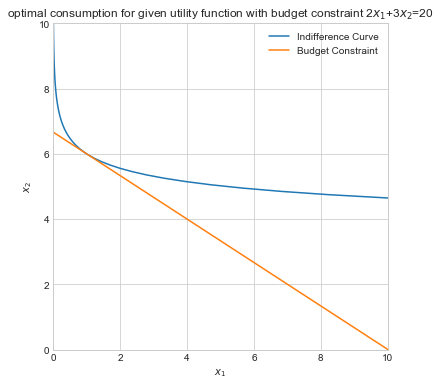

In [20]:
# a. find indifference curve through optimize x1 and x2 for x1 in [0,10]
x1_max = 10
x2_vec,x1_vec = indifference_curve(y1=sol_1.x[0],y2=sol_1.x[1],A=4,beta=0.1,N=100,x1_max=x1_max) 

# b. plot inddifference curve
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,x2_vec,label='Indifference Curve')
ax.plot(x1_vec,budget_line(x1_vec,p1,p2,I),label='Budget Constraint') 
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x1_max])
ax.set_ylim([0,x1_max])
plt.title('optimal consumption for given utility function with budget constraint 2$x_1$+3$x_2$=20')
ax.grid(True)
ax.legend()

set the rest variables equal and only change beta value to see how the indifference curves change 

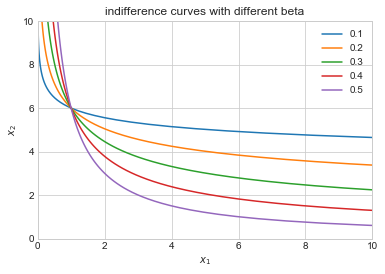

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for Beta in [0.1,0.2,0.3,0.4,0.5]:
    x2_vec,x1_vec = indifference_curve(y1=sol_1.x[0],y2=sol_1.x[1],A=4,beta=Beta,N=100,x1_max=x1_max)
    ax.plot(x1_vec,x2_vec,label=f'{Beta}')

    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('indifference curves with different beta')
    ax.set_xlim([0,10])
    ax.set_ylim([0,10]);

when beta value increase the indifference curve gets steeper, meaning that when $\beta$ becomes higher, 2 goods are more substitute for each other. All indifference curves are running through optimal consumption bundle $(x_1,x_2)$

In [22]:
beta_list = np.linspace(1e-8,0.999,50)

In [23]:
for i,z in enumerate(beta_list): # i is a counter
    u = util(x1=sol_1.x[0],x2=sol_1.x[1],A=4,beta=z)
    print(f'{i:2d}: beta = {z:<6.2f} -> u = {u:<6.3f}')

0: beta = 0.00   -> u = 23.999
 1: beta = 0.02   -> u = 23.139
 2: beta = 0.04   -> u = 22.309
 3: beta = 0.06   -> u = 21.509
 4: beta = 0.08   -> u = 20.737
 5: beta = 0.10   -> u = 19.993
 6: beta = 0.12   -> u = 19.276
 7: beta = 0.14   -> u = 18.585
 8: beta = 0.16   -> u = 17.918
 9: beta = 0.18   -> u = 17.276
10: beta = 0.20   -> u = 16.656
11: beta = 0.22   -> u = 16.059
12: beta = 0.24   -> u = 15.483
13: beta = 0.27   -> u = 14.928
14: beta = 0.29   -> u = 14.392
15: beta = 0.31   -> u = 13.876
16: beta = 0.33   -> u = 13.378
17: beta = 0.35   -> u = 12.898
18: beta = 0.37   -> u = 12.436
19: beta = 0.39   -> u = 11.990
20: beta = 0.41   -> u = 11.560
21: beta = 0.43   -> u = 11.145
22: beta = 0.45   -> u = 10.746
23: beta = 0.47   -> u = 10.360
24: beta = 0.49   -> u = 9.989 
25: beta = 0.51   -> u = 9.630 
26: beta = 0.53   -> u = 9.285 
27: beta = 0.55   -> u = 8.952 
28: beta = 0.57   -> u = 8.631 
29: beta = 0.59   -> u = 8.321 
30: beta = 0.61   -> u = 8.023 
31: beta 

It shows that given fixed consumption bundle $(x_1,x_2)$ = (1.0,6.0) and goods prices $(p_1,p_2)$ = (2.0,3.0), when ${\beta}$ increases, consumer utility decreases

# Conclusion

This project provides analytical and numerical solution for consumer utility maximization problem with cobb douglas utility function. We have found that the optimal values for x1 and x2 are $I\beta$/$p_1$ and $I(1-\beta)$/$p_2$. We then specify values of different variables and found out utility function $4{x_1}^{0.1}{x_2}^{0.9}$ with budget constraint $2{x_1}+3{x_2}=20$ has optimal consumption bundle $(x_1,x_2) = (1.0002,5.9998)$ and the utility of 20.0630. 